# 1. Business Understanding

## Project Overview

The objective of this project is to identify the most promising sector for developing a new sustainability-focused mobile application, adopting a data-driven approach based on Google Play Store data.

Through the analysis of the dataset, the goal is to explore market dynamics in terms of demand, competition, and perceived quality across different app categories.

## Project Goals

Specifically, this analysis aims to:

- Identify categories with the highest demand (number of installs)
- Assess the level of competition (number of apps per category)
- Analyze the relationship between ratings, reviews, and installs
- Evaluate the impact of the business model (Free vs Paid)

The final objective is to propose a data-supported strategic direction for the development of a new sustainability-oriented application.

# 2. Data Understanding

In this section, we load the dataset and inspect its basic structure to understand:

- The number of observations
- The number of variables
- Data types
- Presence of missing values

This initial inspection helps identify potential data quality issues that will need to be addressed during the preprocessing phase.

In [2]:
import pandas as pd

We begin by importing the dataset using pandas.

The `read_csv()` function loads the CSV file into a DataFrame, which is the primary data structure used for data manipulation and analysis in pandas.

In [42]:
df = pd.read_csv('data/googleplaystore.csv')

The `head()` method displays the first five rows of the dataset.

This allows us to quickly inspect:
- The structure of the table
- Column names
- Example values
- Potential formatting inconsistencies


In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


The `info()` method provides a concise summary of the DataFrame, including:

- Total number of rows
- Column names
- Non-null counts
- Data types of each column

This is particularly useful for identifying:
- Missing values
- Incorrect data types
- Columns that may require cleaning or conversion

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The `describe()` method generates descriptive statistics for numerical columns, including:

- Mean
- Standard deviation
- Minimum and maximum values
- Quartiles

This provides a first quantitative overview of the dataset.

In [17]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Initial Observations

From the `info()` output of the main dataset:

- The dataset contains **10,841 observations** and **13 variables**.
- Only the `Rating` column is currently stored as a numerical variable (`float64`).
- Several variables that should be numerical (`Reviews`, `Installs`, `Price`) are stored as `object` type and will require conversion.
- The `Rating` column contains missing values (9367 non-null entries).
- A small number of missing values are also present in `Type`, `Content Rating`, `Current Ver`, and `Android Ver`.

---

From the descriptive statistics of the `Rating` variable (`describe()` method):

- The average rating is **4.19**, indicating generally positive user evaluations.
- Most ratings are concentrated between **4.0 and 4.5** (interquartile range).
- The maximum value is **19.0**, which is not possible given that Google Play ratings range from 1 to 5 --> This suggests the presence of at least one corrupted or misaligned record that will need to be identified and removed during data cleaning.

---

From the first rows of the dataset (`head()` method):

- The `Installs` column contains formatted strings (e.g., "10,000+"), which must be cleaned before numerical analysis.
- The `Price` column is stored as a string (e.g., `$0`, `$4.99`).
- The `Size` column contains mixed formats (e.g., "19M", "Varies with device"), which may require special handling.

Below we manage all discovered issues in order to have a proper preprocessing.

# 3. Data Cleaning and preprocessing

### Corrupted Record Detection

We identified a rating value greater than 5, which is not valid according to the Google Play rating scale.

To inspect the issue:

In [38]:
df[df["Rating"] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Remove Corrupted Record

Since this row is structurally corrupted, we remove **only this record** while keeping all other apps, including those without a rating.

In [45]:
df = df.drop(df[df['Rating'] > 5].index)

We then verify that the maximum rating value is now within the valid range.

In [46]:
df['Rating'].max()

5.0

### Rating Distribution

Before proceeding with further cleaning, we visualize the distribution of app ratings to better understand user evaluation patterns.

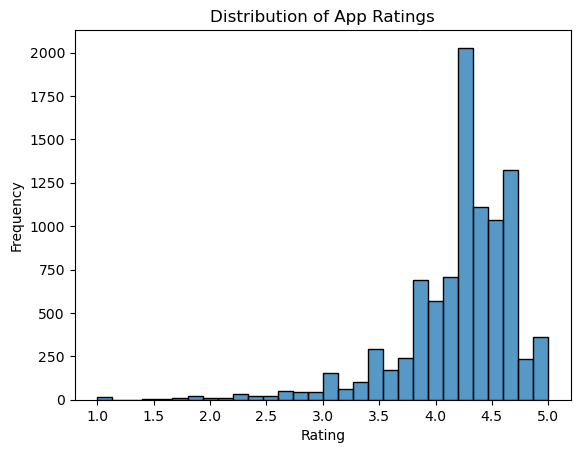

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(df['Rating'], bins=30)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Handling Duplicate Apps

The current dataset contains **duplicate app entries**: 10,840 rows vs 9,659 unique app names.

To ensure data integrity, we will **keep only the entry with the highest number of reviews** for each app.  
This guarantees that each app appears only once in the dataset, based on the available review counts.

In [49]:
# Convert Reviews to numeric (remove commas) to allow proper comparison
df['Reviews'] = df['Reviews'].str.replace(',', '').astype(int)

# Keep the entry with the maximum Reviews for each App
df = df.sort_values('Reviews', ascending=False).drop_duplicates('App', keep='first')

# Reset index
df.reset_index(drop=True, inplace=True)

# Verify results
print(f"Number of rows after removing duplicates: {len(df)}")
print(f"Number of unique apps: {df['App'].nunique()}")

Number of rows after removing duplicates: 9659
Number of unique apps: 9659


# Conversion of Numeric Columns

Some columns are currently stored as text (`object`) and need to be converted to numeric types for analysis:

- **Reviews**: already converted previously
- **Installs**: contains characters like "+" and "," (e.g., "10,000+")
- **Price**: contains `$` symbols (e.g., `$4.99`)

We clean and convert these columns to proper numeric types.

In [ ]:
# Clean and convert Installs
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Clean and convert Price
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

### Check conversion

In [58]:
df[df['Type'] != 'Free'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
172,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
660,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
730,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
1055,Bloons TD 5,FAMILY,4.6,190086,94M,1000000,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
1060,Where's My Water?,FAMILY,4.7,188740,69M,1000000,Paid,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 981.1+ KB


# Step 4 – Exploratory Data Analysis (EDA)

We start by exploring correlations between the numeric variables in the dataset.  
This helps identify:

- Relationships between features (e.g., Reviews vs Installs)
- Potentially redundant variables
- Insights for later analysis or visualization

### Correlation Heatmap of Numeric Features

We look at correlations between numeric columns only (`Rating`, `Reviews`, `Installs`, `Price`) because correlation can only be calculated on numbers.  
Categorical columns like `Category` or `Type` are not included.

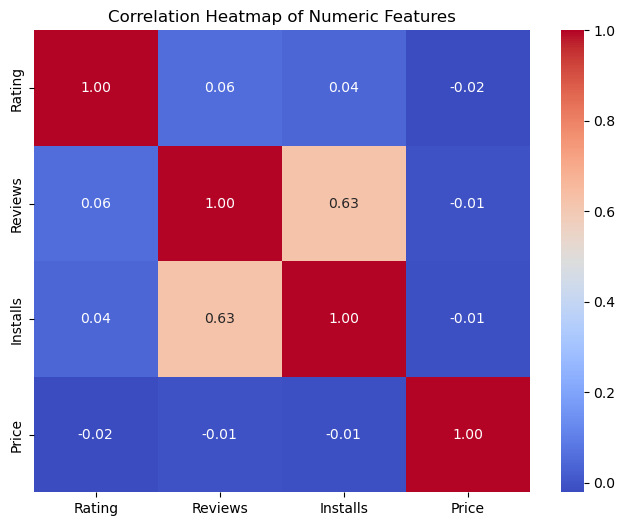

In [62]:
# Select only numeric columns
numeric_cols = ['Rating', 'Reviews', 'Installs', 'Price']
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Distribution of App Ratings

This chart shows how app ratings are distributed across the dataset.  

- Helps identify the most common ratings and any outliers.  
- Only considers apps with a valid rating.

In [88]:
import plotly.express as px

In [96]:
# Rating distribution
df_rating = df[df['Rating'].notna()]
fig_rating = px.histogram(df_rating, x='Rating', nbins=30, title='Distribution of App Ratings')
fig_rating.show()

### Distribution of Reviews

This histogram shows how user reviews are distributed across apps.

- The y-axis is displayed on a logarithmic scale to better visualize differences between low and high frequencies.
- Most apps have relatively few reviews, while a small number reach very high values.

In [100]:
# Reviews distribution (log scale for clarity)
fig_reviews = px.histogram(df, x='Reviews', log_y=True, nbins=50, title='Distribution of Reviews')
fig_reviews.show()

### Distribution of Installs

This histogram shows how app installations are distributed across the dataset.

- The distribution is highly skewed: most apps have relatively low install numbers.
- A small number of apps reach tens or hundreds of millions of installs.
- Very few apps exceed 1 billion installs.

This pattern highlights the strong market concentration, where a limited number of apps dominate overall downloads.

In [102]:
# Installs distribution (log scale)
fig_installs = px.histogram(df, x='Installs', log_y=True, nbins=50, title='Distribution of Installs')
fig_installs.show()

### Distribution of App Prices

This histogram shows the distribution of app prices across the dataset.

- Most apps are free, as confirmed by the strong concentration at price = 0 (see `describe()` function below considering the quartile ).
- Paid apps are relatively fewer and generally concentrated at low price ranges.
- A small number of apps have very high prices (outliers), which increase the overall variance.

This confirms that the Google Play market is largely dominated by free apps, with paid apps representing a smaller segment.

In [103]:
# Price distribution
fig_price = px.histogram(df[df['Type'] != 'Free'], x='Price', nbins=20, title='Distribution of Paid App Prices')
fig_price.show()

In [108]:
df['Price'].describe()

count    9659.000000
mean        1.097231
std        16.851618
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### Category Analysis: Competition and Market Interest

To identify promising sectors, we analyze app categories from two perspectives:

- Number of apps per category → level of competition
- Total installs per category → level of market demand

Comparing these two dimensions helps identify categories with strong demand and manageable competition.

In [109]:
category_count = df['Category'].value_counts().reset_index()
category_count.columns = ['Category', 'Number of Apps']

fig_cat_count = px.bar(category_count,
                       x='Category',
                       y='Number of Apps',
                       title='Number of Apps per Category')
fig_cat_count.show()

In [110]:
category_installs = (
    df.groupby('Category')['Installs']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

fig_cat_installs = px.bar(category_installs,
                          x='Category',
                          y='Installs',
                          title='Total Installs per Category')
fig_cat_installs.show()

### Category Positioning: Competition vs Market Strength

To better understand market structure, we compare categories using:

- Number of Apps → level of competition
- Average Installs per App → average performance within the category
- Total Installs → overall market size

This visualization helps identify:
- Categories dominated by a few large players
- Categories with balanced demand and moderate competition

In [124]:
category_summary = (
    df.groupby('Category')
      .agg(
          Number_of_Apps=('App', 'count'),
          Total_Installs=('Installs', 'sum'),
          Avg_Installs=('Installs', 'mean')
      )
      .sort_values('Total_Installs', ascending=False)
      .reset_index()
)

fig_category_positioning = px.scatter(
    category_summary,
    x='Number_of_Apps',
    y='Avg_Installs',
    size='Total_Installs',
    hover_name='Category',
    title='Category Positioning: Competition vs Average Installs',
    size_max=60
)

fig_category_positioning.update_layout(
    xaxis_title='Number of Apps (Competition)',
    yaxis_title='Average Installs per App'
)

fig_category_positioning.show()

In [123]:
category_summary.sort_values('Avg_Installs', ascending=False).head(15)

,Category,Number_of_Apps,Total_Installs,Avg_Installs
0,COMMUNICATION,315,11038276251,3.504215e+07
1,VIDEO_PLAYERS,164,3931902720,2.397502e+07
2,SOCIAL,239,5487867902,2.296179e+07
3,PHOTOGRAPHY,281,4658147655,1.657704e+07
4,PRODUCTIVITY,374,5793091369,1.548955e+07
5,GAME,945,13447924415,1.423061e+07
6,TRAVEL_AND_LOCAL,219,2894887146,1.321866e+07
7,ENTERTAINMENT,86,984660000,1.144953e+07
8,TOOLS,829,8102771915,9.774152e+06
9,NEWS_AND_MAGAZINES,254,2369217760,9.327629e+06


### Summary of EDA Findings

So far, the exploratory analysis has revealed several key insights:

1. The market is highly concentrated:
   - Most apps have relatively low installs.
   - A small number of apps reach hundreds of millions or billions of installs.


2. The Google Play ecosystem is dominated by free apps:
   - At least 75% of apps are free.
   - Paid apps represent a smaller segment and are typically low-priced.

3. Category analysis shows different market dynamics:
   - Some categories (e.g., GAME, FAMILY) are highly competitive.
   - Others (e.g., COMMUNICATION) show very high average installs but are dominated by a few major players.
   - Categories like PRODUCTIVITY, HEALTH_AND_FITNESS, and TRAVEL_AND_LOCAL show meaningful demand with moderate competition.

These findings help narrow the focus toward categories that combine:
- Sufficient market demand
- Manageable competition
- Potential room for differentiation

# Step 5 – Correlation & Hypothesis Testing

In this step, we move from exploratory analysis to hypothesis-driven evaluation.

We test specific assumptions about the relationships between variables, such as:

- The impact of the business model (Free vs Paid) on installs
- The relationship between rating and popularity
- Differences across selected categories

The objective is to validate insights using quantitative comparisons, supporting strategic decisions with data rather than visual impressions alone.

### Hypothesis 1: Do Free Apps Have More Installs?

We compare free and paid apps to evaluate whether the business model impacts the number of installs.

This helps understand whether a free model may be more suitable for a sustainability-focused app.

In [127]:
fig_free_paid = px.box(
    df,
    x='Type',
    y='Installs',
    title='Installs Distribution: Free vs Paid',
    log_y=True
)

fig_free_paid.show()

In [128]:
df.groupby('Type')['Installs'].mean()

Type
Free    8.452961e+06
Paid    7.607929e+04
Name: Installs, dtype: float64

In [129]:
df.groupby('Type')['Installs'].median()

Type
Free    100000.0
Paid      1000.0
Name: Installs, dtype: float64

### Results – Hypothesis 1

The comparison between free and paid apps shows a clear difference:

- Free apps have a significantly higher average and median number of installs.
- The median install count for free apps (100,000) is much higher than for paid apps (1,000).
- The boxplot confirms that free apps generally reach a wider audience, although both groups show outliers.

These results strongly suggest that a free or freemium business model is more aligned with user acquisition dynamics in the Google Play market.

### Hypothesis 2: Does Rating Influence Installs?

We test whether higher-rated apps tend to achieve more installs.

If a positive relationship exists, quality perception (rating) may be an important factor in market success.

In [130]:
df[['Rating', 'Installs']].corr()

,Rating,Installs
Rating,1.000000,0.040245
Installs,0.040245,1.000000


In [131]:
df_rating_valid = df[df['Rating'].notna()]

fig_rating_installs = px.scatter(
    df_rating_valid,
    x='Rating',
    y='Installs',
    title='Rating vs Installs',
    log_y=True,
    opacity=0.5
)

fig_rating_installs.show()

### Results – Hypothesis 2

The correlation between Rating and Installs is very weak (≈ 0.04).

The scatter plot does not show a clear upward trend, suggesting that higher-rated apps do not necessarily achieve more installs.

While most highly installed apps have ratings above 3.5, rating alone does not explain popularity but other unobserved factors may influence app popularity. 

# Step 6 – Competitive Landscape Analysis

In this step, we analyze not only market structure (installs and competition), 
but also user perception through sentiment analysis.

By merging app-level market data with user review sentiment, 
we can evaluate:

- Which categories generate high engagement
- How users perceive apps within each category
- Whether high-demand categories also show positive user sentiment

This allows a more comprehensive evaluation of strategic opportunities.

### Preparing Review Sentiment Data

The review dataset contains multiple entries per app, as each row represents a single user review.

Some reviews do not contain a valid sentiment score (`Sentiment_Polarity`).  
Since sentiment analysis requires numeric values, we remove entries without a valid sentiment score before aggregation.

This ensures that the average sentiment per app is calculated using only valid observations.

In [139]:
df_reviews = pd.read_csv('data/googleplaystore_user_reviews.csv')

# Rows removals
df_reviews_clean = df_reviews.dropna(subset=['Sentiment_Polarity'])

# output of cleaned dataframe
df_reviews_clean.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


### Aggregating Sentiment at App Level

Each app can have multiple user reviews, and therefore multiple sentiment scores.

To integrate sentiment into the main dataset, we first compute the average sentiment score per app.  

This step ensures that:
- Each app is represented by a single sentiment value.
- The sentiment measure is comparable across apps.
- The subsequent merge with the main dataset remains consistent at app level.

The resulting table contains one row per app with its average sentiment polarity.

In [140]:
app_sentiment = (
    df_reviews_clean
    .groupby('App')['Sentiment_Polarity']
    .mean()
    .reset_index()
)

app_sentiment.head()

,App,Sentiment_Polarity
0,10 Best Foods for You,0.470733
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405
2,11st,0.181294
3,1800 Contacts - Lens Store,0.318145
4,1LINE – One Line with One Touch,0.196290


### Merging Market Data with Sentiment Data

We merge the app-level sentiment table with the main dataset using a left join on the `App` column.

This ensures that:
- All apps from the main dataset are preserved.
- Sentiment information is added where available.
- Apps without review sentiment remain in the dataset with missing sentiment values.

The merged dataset now contains both market performance metrics and user perception indicators.

In [141]:
df_merged = df.merge(app_sentiment, on='App', how='left')
df_merged[['App','Category','Installs','Sentiment_Polarity']].head()

,App,Category,Installs,Sentiment_Polarity
0,Facebook,SOCIAL,1000000000,-0.007003
1,WhatsApp Messenger,COMMUNICATION,1000000000,NaN
2,Instagram,SOCIAL,1000000000,NaN
3,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000,NaN
4,Clash of Clans,GAME,100000000,0.036756


### Comparative Analysis of Selected Categories

To identify a strategically promising sector, we compare selected categories across four key dimensions:

- Number of Apps (competition level)
- Total Installs (market size)
- Average Installs per App (market performance)
- Average Sentiment (user perception)

This comparison allows a balanced evaluation rather than focusing on a single metric.

In [142]:
category_sentiment = (
    df_merged
    .groupby('Category')
    .agg(
        Avg_Sentiment=('Sentiment_Polarity','mean'),
        Number_of_Apps=('App','count')
    )
    .reset_index()
    .sort_values('Avg_Sentiment', ascending=False)
)

category_sentiment.head(10)

,Category,Avg_Sentiment,Number_of_Apps
5,COMICS,0.389619,56
10,EVENTS,0.384549,64
19,MAPS_AND_NAVIGATION,0.321889,131
22,PARENTING,0.313462,60
15,HEALTH_AND_FITNESS,0.312430,288
8,EDUCATION,0.300775,106
32,WEATHER,0.298206,79
23,PERSONALIZATION,0.274725,376
1,AUTO_AND_VEHICLES,0.270667,85
13,FOOD_AND_DRINK,0.264544,112


In [146]:
selected_categories = [
    'HEALTH_AND_FITNESS',
    'PRODUCTIVITY',
    'TRAVEL_AND_LOCAL',
    'EDUCATION',
    'COMMUNICATION',
    'COMICS',
    'EVENTS',
    'MAPS_AND_NAVIGATION'
]

category_comparison = (
    df_merged[df_merged['Category'].isin(selected_categories)]
    .groupby('Category')
    .agg(
        Number_of_Apps=('App','count'),
        Total_Installs=('Installs','sum'),
        Avg_Installs=('Installs','mean'),
        Avg_Sentiment=('Sentiment_Polarity','mean')
    )
    .sort_values('Total_Installs', ascending=False)
    .reset_index()
)

category_comparison

,Category,Number_of_Apps,Total_Installs,Avg_Installs,Avg_Sentiment
0,COMMUNICATION,315,11038276251,3.504215e+07,0.189158
1,PRODUCTIVITY,374,5793091369,1.548955e+07,0.195325
2,TRAVEL_AND_LOCAL,219,2894887146,1.321866e+07,0.206450
3,HEALTH_AND_FITNESS,288,1144022512,3.972300e+06,0.312430
4,MAPS_AND_NAVIGATION,131,503281890,3.841846e+06,0.321889
5,EDUCATION,106,188952000,1.782566e+06,0.300775
6,COMICS,56,44981150,8.032348e+05,0.389619
7,EVENTS,64,15973161,2.495806e+05,0.384549


### Average Sentiment by Category

This chart shows the average user sentiment for each category.

Higher values indicate more positive user perception based on review sentiment analysis.

This metric adds a qualitative dimension to the competitive landscape, complementing installs and competition data.

In [138]:
fig_sentiment = px.bar(
    category_sentiment,
    x='Category',
    y='Avg_Sentiment',
    title='Average Sentiment by Category'
)

fig_sentiment.show()

### Focus on Health & Fitness

Although several categories show high average sentiment, Health & Fitness stands out because it balances three key dimensions:

- Strong market demand (over 1 billion total installs)
- Moderate competition (fewer apps than highly saturated categories such as FAMILY or GAME)
- Positive average user sentiment

Unlike COMMUNICATION, which is highly concentrated and dominated by major players, Health & Fitness shows demand without extreme market concentration.

This makes it a strategically interesting candidate for further evaluation.

# Step 7 – Strategic Proposal

Based on the previous analysis, we now translate data insights into a strategic decision.

The objective is to propose a sustainability-focused app concept in:

- Market demand
- Competitivity
- User perception (sentiment)

### Data-Driven Summary

The analysis showed that:

- Free apps significantly outperform paid apps in install volume.
- Rating alone does not explain install success.
- The market is highly concentrated in some categories (e.g., Communication, Game).
- Health & Fitness offers a balanced profile:
  - Significant total installs (~1.1B)
  - Moderate competition
  - Positive user sentiment

### Proposed App Concept: Sustainable Habit & Wellness Tracker

We propose developing a sustainability-focused app within the Health & Fitness category.

Concept:
A mobile application that helps users track and improve sustainable lifestyle habits, such as:

- Reducing carbon footprint
- Sustainable nutrition tracking
- Eco-friendly mobility habits
- Water and energy consumption awareness
- Gamified environmental challenges

Reasons:

1. Positive sentiment indicates openness to lifestyle-related applications.
2. The market is active but not dominated by a few extreme players.
3. A freemium model aligns with overall market dynamics.

### Business Model

Given the strong dominance of free apps, the recommended model is:

- Freemium structure
  - Free features
  - Premium sustainability insights
  - Advanced analytics
  - Personalized recommendations

Optional monetization:
- Ethical partnerships with sustainable brands
- No advertising

### Market Differentiation

To stand out in the Health & Fitness category, the app should:

- Focus specifically on sustainability
- Integrate behavioral science principles
- Include social challenges to stimulate engagement
- Provide measurable environmental impact metrics

This leverages the existing demand while targeting a global trend.